In [87]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from utils import *
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Helvetica'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# del hc  # uncomment to reload 
try: print('Histories already loaded.') if hc else None
except: hc = load_histories_and_configs(['ix4onq8c', '9cclxb43'])

_split = make_split_df(hc)
_levels = make_df(hc, 'pruning_levels')
_pr = make_df(hc, 'pruning_rate')
_splitrange = make_splitrange_df(hc)
_first, _last = make_dfs_at_splitrange(hc, _splitrange)

# average over the seeds via pruning_levels (sweep parameters)
ydf = pd.concat([_split, _levels], axis=1).groupby('pruning_levels').sum()
xdf = pd.concat([_pr, _levels], axis=1).groupby('pruning_levels').mean()

Histories already loaded.


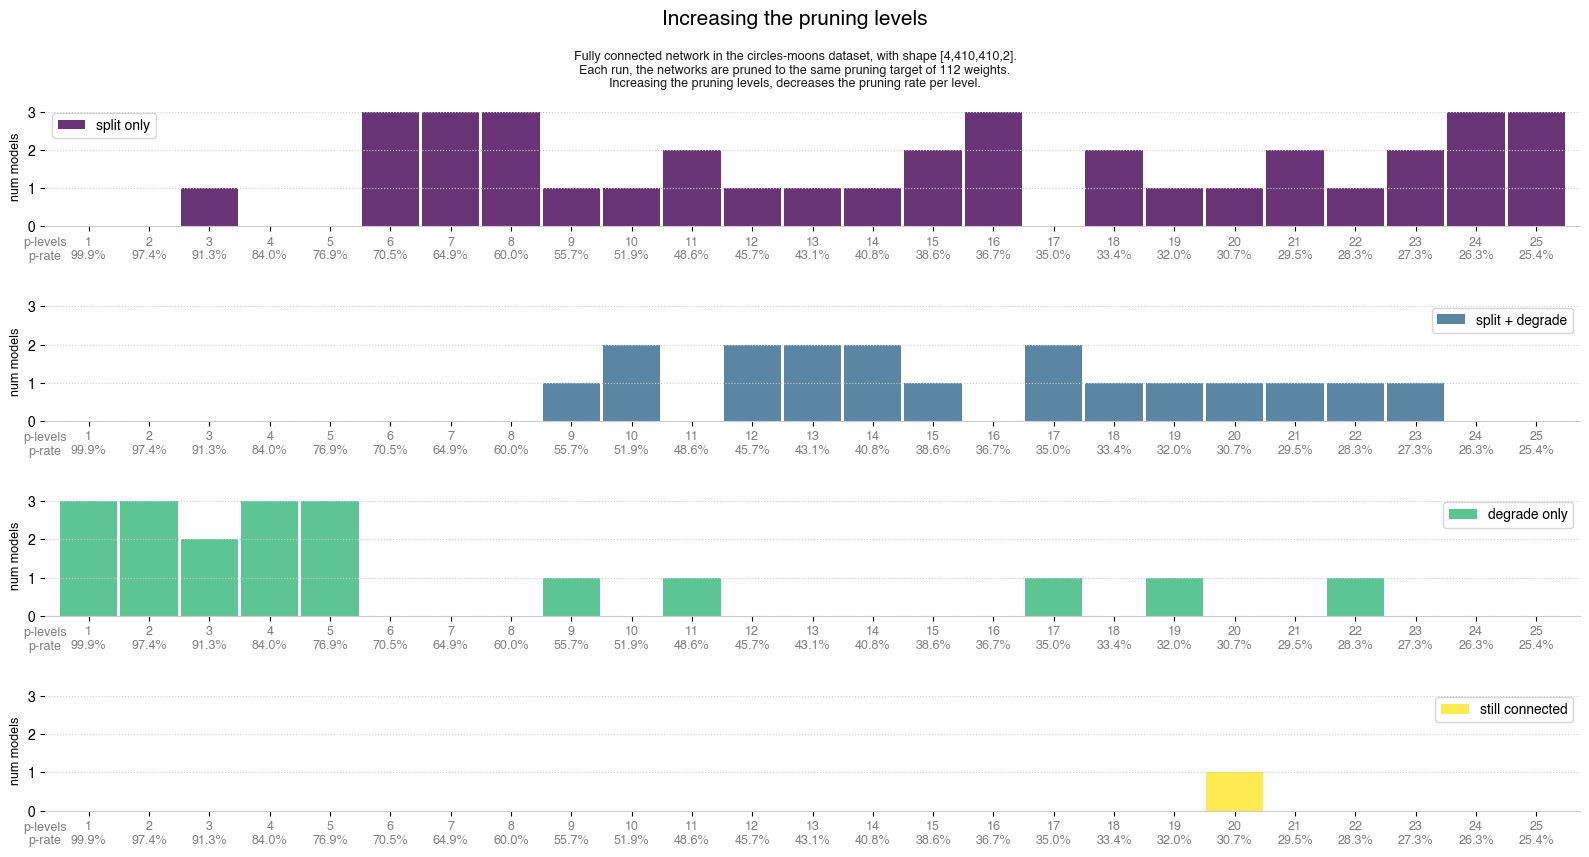

In [94]:
title='Increasing the pruning levels'
description=(
'''
Fully connected network in the circles-moons dataset, with shape [4,410,410,2].
Each run, the networks are pruned to the same pruning target of 112 weights.
Increasing the pruning levels, decreases the pruning rate per level.
'''
)

# Create figure and do general styling
fig, axes = plt.subplots(nrows=len(ydf.columns), figsize=(16,9), sharey=True, sharex=False)
fig.suptitle(title, fontweight='regular', fontsize=15, fontname='Helvetica')
fig.text(0.5, 0.95, description, ha='center', va='top', fontsize=9, color=(0.1,0.1,0.1))

# plot the data
ydf.plot.bar(
    ax=axes,
    subplots=True,
    width=0.95,  
    alpha=0.8,
    colormap='viridis',
    rot=0,
)

# x axis data
xticks = np.arange(len(xdf.index))
xticklabels = [f'{l}\n{pr*100:.1f}%' for l, pr in xdf['pruning_rate'].items()]

for ax in axes:
    ax.set_yticks(np.arange(np.max(ydf)+1))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontsize=9, color='gray')
    ax.set_ylabel('num models', fontsize=9)
    #ax.set_ylabel('models', fontsize=9, rotation=0)
    #ax.yaxis.set_label_coords(-0.01, 1)
    ax.set_xlabel('p-levels\np-rate', fontsize=9, color='gray')
    ax.xaxis.set_label_coords(0.0, -0.087)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
set_style(axes)

/Users/max/Documents/Studium/_Master_Thesis/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/max/Documents/Studium/_Master_Thesis/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Text(0.5, 0, 'number of hidden neurons')

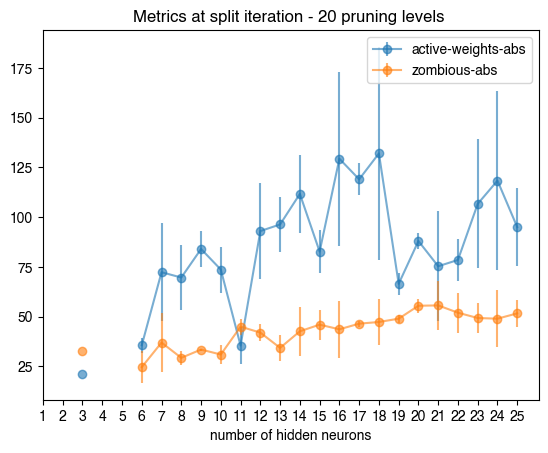

In [91]:
group_df = _levels
source_df = _first
source_keys = [
    'active-weights-abs', 
    'zombious-abs',
    ]

group = make_group(group_df, source_df, source_keys)

for key in source_keys:
    df = mean_std_from_group(group, key)
    errorbar_from_df(df, label=key, marker='o', alpha=0.6)
plt.title('Metrics at split iteration - 20 pruning levels ')
plt.xlabel('number of hidden neurons')